# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\YADNESH BHANUSHALI\AppData\Local\Temp\pip-install-bw2ivd42\tensorflow-gpu_ca3d824a62d84c3e9ebfbe9d00c9c032\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflo


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asgiref                      3.6.0
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        22.2.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.11.2
bleach                       6.0.0
cachetools                   5.3.0
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.0.1
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.6
decorator                    5.1.1
defusedxml                   0.7.1
Django                       4.2
executing                    1.2.0
fas


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

NameError: name 'PhysicalDevice' is not defined

# 2. Remove dodgy images

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [8]:
data_dir = 'data' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
#             os.remove(image_path)

# 3. Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 154 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
#get another batch from the iterator
batch = data_iterator.next()

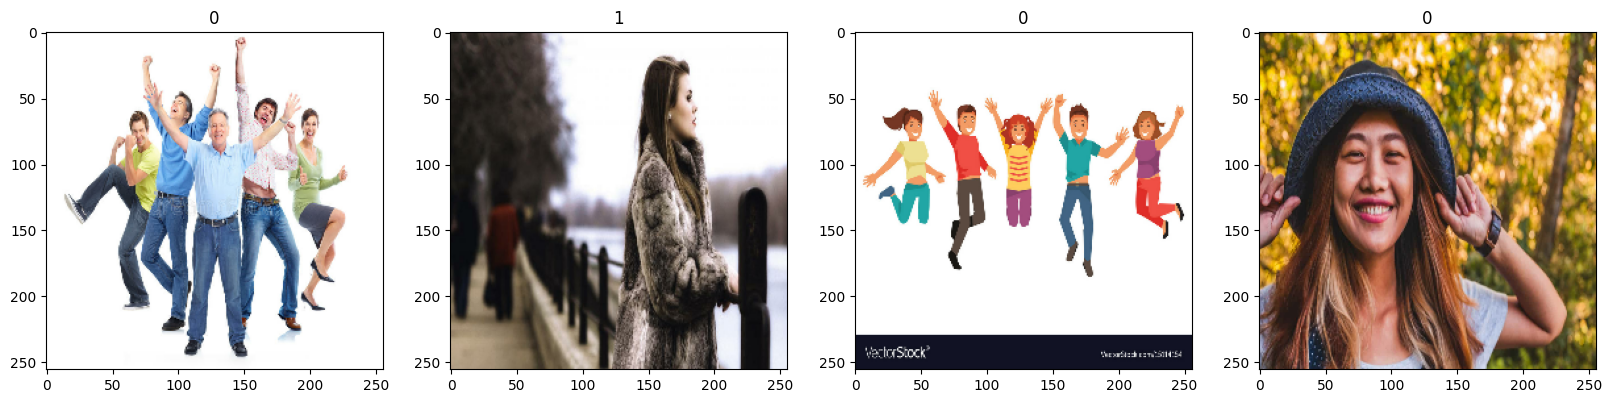

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale data 

In [16]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [17]:
data.as_numpy_iterator().next()

(array([[[[0.47039962, 0.65152705, 0.63951725],
          [0.4434666 , 0.639545  , 0.6277803 ],
          [0.4238511 , 0.6277727 , 0.61992955],
          ...,
          [0.19377968, 0.32364574, 0.30257928],
          [0.3157332 , 0.4660027 , 0.4368279 ],
          [0.34277967, 0.50345147, 0.47207892]],
 
         [[0.48128015, 0.66240764, 0.6503978 ],
          [0.44336703, 0.6394455 , 0.6276808 ],
          [0.43406862, 0.6379902 , 0.63014704],
          ...,
          [0.3373765 , 0.47660512, 0.45185786],
          [0.36435786, 0.5223743 , 0.49127892],
          [0.35740942, 0.5230804 , 0.48926452]],
 
         [[0.4729296 , 0.6535386 , 0.64170164],
          [0.4561964 , 0.6522748 , 0.6405101 ],
          [0.43014705, 0.6340686 , 0.6262255 ],
          ...,
          [0.38025093, 0.533644  , 0.50342804],
          [0.37839308, 0.5434537 , 0.5098346 ],
          [0.35962775, 0.5360318 , 0.4981455 ]],
 
         ...,
 
         [[0.33855602, 0.40290958, 0.38053674],
          [0.34677

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

3

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [21]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Training Models 

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 13s 3s/step - loss: 1.0114 - accuracy: 0.5833 - val_loss: 0.7552 - val_accuracy: 0.4375
Epoch 2/20
3/3 [==============================] - 11s 3s/step - loss: 0.7746 - accuracy: 0.3958 - val_loss: 0.6733 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 10s 3s/step - loss: 0.6780 - accuracy: 0.5521 - val_loss: 0.5232 - val_accuracy: 0.9062
Epoch 4/20
3/3 [==============================] - 10s 3s/step - loss: 0.6010 - accuracy: 0.6146 - val_loss: 0.6203 - val_accuracy: 0.5312
Epoch 5/20
3/3 [==============================] - 10s 3s/step - loss: 0.5600 - accuracy: 0.6042 - val_loss: 0.6210 - val_accuracy: 0.7188
Epoch 6/20
3/3 [==============================] - 10s 3s/step - loss: 0.5970 - accuracy: 0.6875 - val_loss: 0.6425 - val_accuracy: 0.6250
Epoch 7/20
3/3 [==============================] - 11s 3s/step - loss: 0.4632 - accuracy: 0.7500 - val_loss: 0.6170 - val_accuracy: 0.5938
Epoch 8/20
3/3 [==================

# 8. Plotting Data 

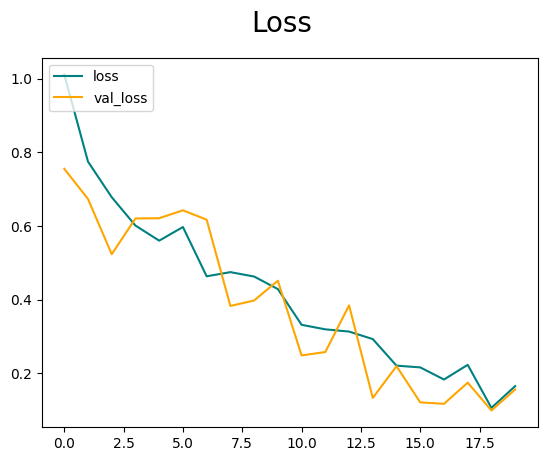

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

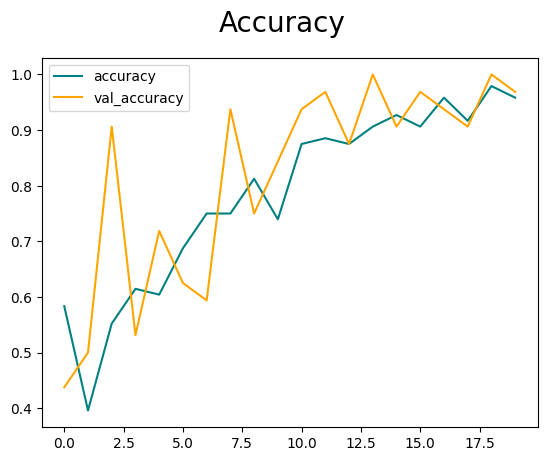

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate 

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [35]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10.Testing The Model

In [36]:
import cv2

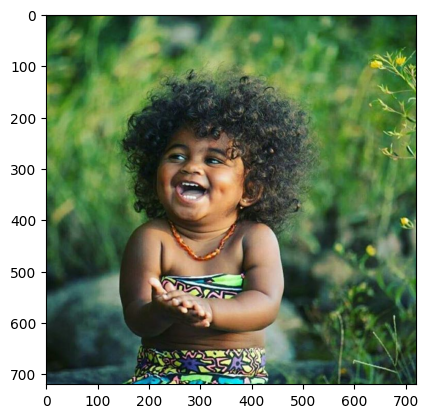

In [63]:
img = cv2.imread('happ1.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

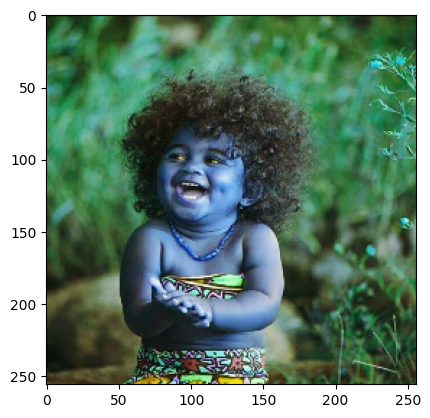

In [64]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 60ms/step


In [66]:
yhat

array([[0.35336927]], dtype=float32)

In [62]:
if yhat > 0.5: 
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy


# 11. Saving the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','happysadmodel.h5'))

In [ ]:
os.path.join('models','happysadmodel.h5')

In [ ]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [ ]:
new_model

In [ ]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')